# Bagging
Bagging je jeden zo spôsobou učenia súborom metód. Zakladá sa na princípe zlučovania nezávislých klasifikátorov pomocou hlasovania. Znie to celkom komplikovane, ale princíp je v podstate jednoduchý.

Tak si to skúsme bližšie vysvetliť.

Predstavme si, že máme skupinu desiatich doktorov(klasifikátorov), a ich jedného šéfa(hlasovanie). V meste sa totiž šíri nová choroba a my potrebujeme určiť, ktorí ľudia ju majú a ktorý nie. Aby však doktori vedeli určiť, či danú chorobu človek má alebo nemá, potrebujeme staršie pozorovania o pacientoch, o ktorých sa už choroba potvrdila alebo vyvrátila. Tie máme.

Pri jednoduchom klasifikátore, by sme dané údaje poskytli jednému klasifikátoru (doktorovi), a keď by sa ich naučil, chceli by sme aby vedel určovať kto chorobu má a kto nie. Tak by sme to urobili pomocou jednoduchého klasifikátora. V tomto prípade by bol však vytvorený model do značnej miery ovplyvnený, ak by v údajoch boli chybné merania, alebo len merania, ktoré nezapadajú do celkového modelu.


In [4]:
# V ukážkach kódu sa budeme tváriť, že Iris dataset sú naše záznamy už zaradených pacientov.

# Takto by to vyzeralo keby sme chceli využiť len jeden klasifikátor (doktora)

# importneme funkciu na načítanie datasetu
from sklearn.datasets import load_iris
# načítame dataset
iris = load_iris()
# môžeme si vypísať názvy atribútov a cieľových tried
print(iris.feature_names)
print(iris.target_names)

# Môžme vidieť, že tu sú cieľové treidy 3, nie dve, majme teda v ukážkach kódu aj takých čo sú nezaradení ani chorý ani zdravý.
# V dalších výsledkoch však nebudeme mať slovné pomenovanie zaradených tried ale len číselné 0, 1 a 2.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
# do X si uložme údaje z pozorovaní
X = iris.data
# do Y si uložme zaradenia jednotlivých pozorovaní
Y = iris.target

# Následne si rozdelíme množinu pozorovaní a množinu zaradení na trénovaciu a testovaciu
# Chceme totiž vedieť ešte pred naozajstnými pacientmi vedieť ako dobre sa naši doktori naučili uročovať chorých a zdravých

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

# Nášho doktora budeme reprezentovať pomocou rozhodovacieho stromu
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1)

# Poskytneme doktorovi trénovacie pozorovania nech sa naučí určovať chorobu
tree.fit(X_train,Y_train)
# Overíme si ako dobre sa to náš doktor naučil
prediction = tree.predict(X_test)

# importneme funkciu na vyhodnotenie
from sklearn import metrics
print('Doktorova úspešnosť: ')
print(round(metrics.accuracy_score(Y_test, prediction),2))

print("Zaradenia pacientov z testovacej vzorky podľa doktora (0-zdravý, 1-chorý, 2-neviem):")
print(prediction)

Doktorova úspešnosť: 
0.69
Zaradenia pacientov z testovacej vzorky podľa doktora (0-zdravý, 1-chorý, 2-neviem):
[1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 1]


Ak sa však rozhodnme použiť bagging, zbavíme sa tejto nežiadúcej črty, ktorá by spôsobila, že pozorovania, ktoré by boli odlišné od tých trénovacích by robili nášmu modelu problém. Budeme však na to potrebovať všetkých 10 doktorov.

### A to je všetko?
Nie. To nie je všetko. Keby sme len namiesto jedného doktora zobrali všetkých desať, a dali každému rovanké údaje, boli by ich výsledky veľmi podobné ak nie identické. Chodili totiž na rovnakú školu a majú rovnaké vzedalanie a pravidlá akými sa riadia.


In [44]:
# Majme teda desať doktorov
trees = []


# Nainicializujme si 10 klasifikátorov
for i in range(10):
    trees.append(DecisionTreeClassifier(max_depth=1)) 

# Poskytneme každému doktorovi rovnaké trénovacie pozorovania nech sa naučí určovať chorobu
for t in trees:
    t.fit(X_train,Y_train)
    
# Overíme si ako dobre sa to naši doktori naučili
predictions = []

for t in trees:
    predictions.append(t.predict(X_test))    

i = 1
for p in predictions:
    print('Doktor '+str(i)+' úspešnosť: ')
    print(round(metrics.accuracy_score(Y_test, p),2))
    i += 1
    
# Všetci majú rovnaké výsledky

Doktor 1 úspešnosť: 
0.69
Doktor 2 úspešnosť: 
0.69
Doktor 3 úspešnosť: 
0.69
Doktor 4 úspešnosť: 
0.69
Doktor 5 úspešnosť: 
0.69
Doktor 6 úspešnosť: 
0.69
Doktor 7 úspešnosť: 
0.69
Doktor 8 úspešnosť: 
0.69
Doktor 9 úspešnosť: 
0.69
Doktor 10 úspešnosť: 
0.69


In [45]:
# Ak chceme vidieť konkrétne hodnoty 

# Všetci doktori klasifikovali rovnako

# Toto je len kód na zobrazenie výsledkov, ten si nemusíte veľmi pozerať ak vás nezaujíma
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

cols = []
for i in range(0,len(predictions[1])):
    cols.append(i)

predictions2 = []

for prediction in predictions:
    predictions2.append(np.stack((prediction,np.array(cols)), axis=1))

predictions2 = np.vstack(predictions2)
predictions2 = predictions2[predictions2[:, 1].argsort()]

halfs = np.split(predictions2, 3)

counts1 = pd.DataFrame(halfs[0])
counts2 = pd.DataFrame(halfs[1])
counts3 = pd.DataFrame(halfs[2])

## Zaradenia pacientov doktormi do skupín. Os X sú pacienti. Os y sú hlasy pre danú skupinu od doktorov. Existujú tri možné zaradenia 1, 2 a 3 pre každého pacienta.

### Všetci doktori zaradili pacientov rovnako

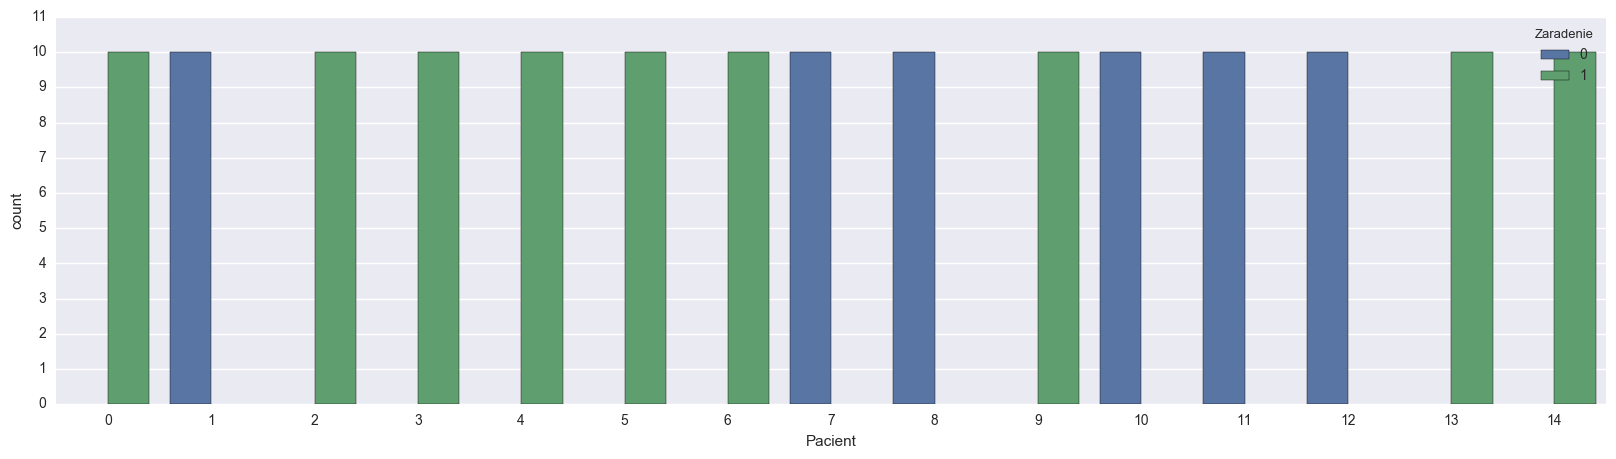

In [50]:
counts1.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts1)
plt.yticks(np.arange(0,12,1))
plt.show()

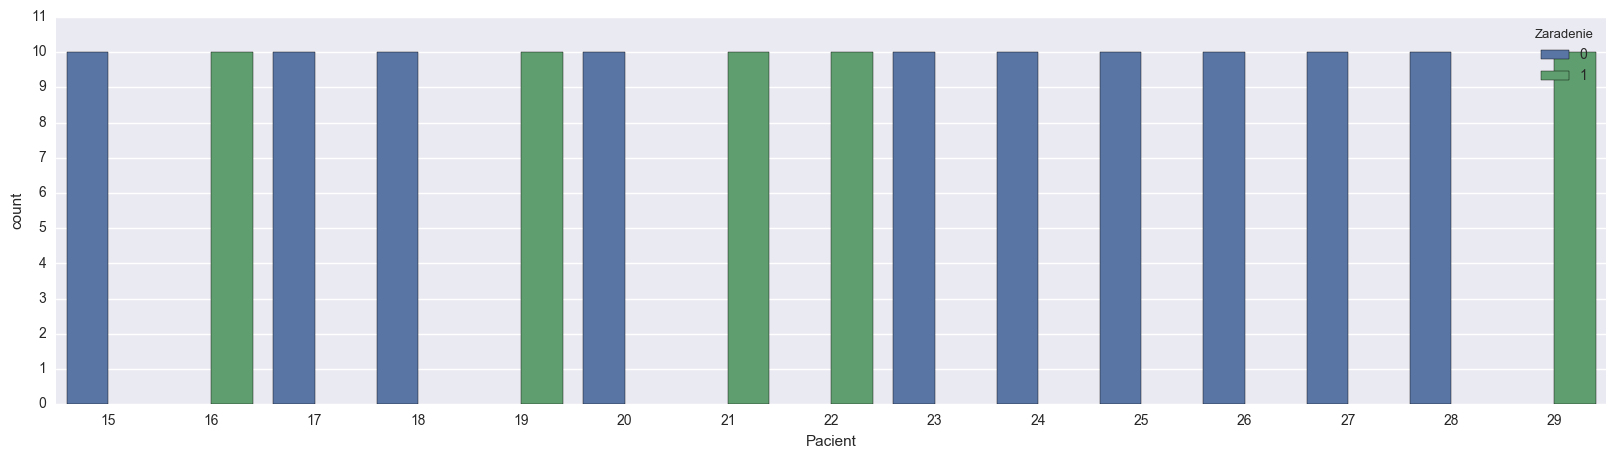

In [49]:
counts2.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts2)
plt.yticks(np.arange(0,12,1))
plt.show()

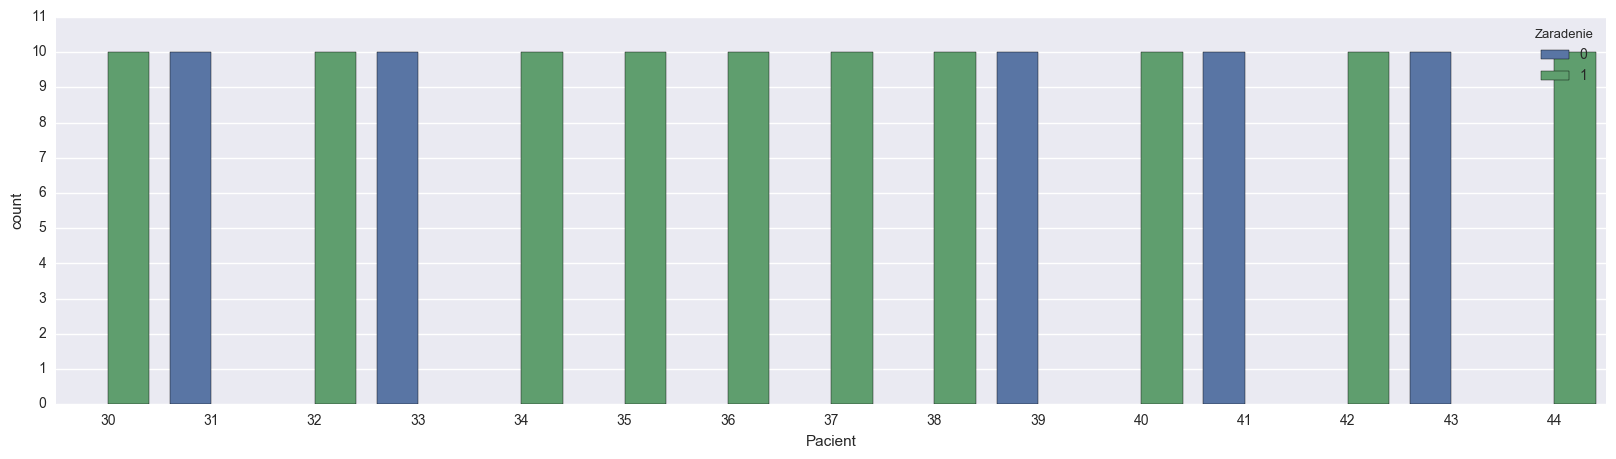

In [51]:
counts3.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts3)
plt.yticks(np.arange(0,12,1))
plt.show()

Nie. My potrebuje dosiahnuť nezávislosť jednotlivých doktorov. Aby každý prišiel s trochu iným modelom, podľa ktorého bude posudzovať či človek chorobu má alebo nemá. Až ich šéf potom podľa toho, ku ktorému názoru sa priklonila väčšina určí či človek chorobu má alebo nemá. Tým že bude každý model mierne odlišný, sa nám hlasovaním vyrušia chyby jednotlivých základných modelov. Aspoň taká je teória, ktorou sa riadi bagging a platí len v prípade, že každý základný klasifikátor je lepší ako náhoda, teda ako 50%.

### Ako dosiahnuť nezávislosť klasifikátorov
Povedali sme teda, že potrebujeme dosiahnuť nezávislosť doktorov. Na to existujú tri základné spôsoby.

+ klasický bagging
+ feature bagging
+ rôzne algoritmy klasifikácie

#### Klasický bagging
Budeme pokračovať v príklade doktorov a choroby. 

Doktorom teda nechceme dať rovnaké údaje. Ako ich teda zmeniť tak, aby sa zachovali informácie, ktorú potrebujú aby sa naučili rozoznať chorých a zdravých. Klasický bagging tento problém rieši nasledovným spôsobom.

Z množiny pozorovaní už označených pacientov, vytvorí desať kópií. Nebudú to však úplne presné kópie základnej množiny.
Každá množina sa vytvorí náhodným vyberaním pozorovaní s opakovaním z tej základnej, až kým sa nedosiahne veľkosť pôvodnej množiny. Jednotlivé pozorovania môžu byť do každej množiny vybraté viackrát.

Tým, že každý doktor bude mať mierne odlišnú trénovaciu množinu pacientov na zaradenie, dosiahne sa odlišnoť v modeloch, podľa ktorých budú zaraďovať ľudí.

In [52]:
# Importneme bagging, ktorý je naimplementovaný v knižnici scikit-learn
from sklearn.ensemble import BaggingClassifier

# Vytvorme si teda bagging klasifikátor, ktorý bude mať ako základný klasifikátor už náš známy rozhodovací strom(doktora)
# Tomuto klasifikátoru sa dá nastaviť viacero parametrov
# Nás však teraz zaujíma len to, že chceme aby bolo:
#      - desať základných klasifikátorov (n_estimators)
#      - aby sa pozoravania v kópiach množín mohli opakovať (bootstrap)
#      - aby boli trénovacie množiny rovnako veľké ako pôvodná (max_samples)
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=1),n_estimators = 10,bootstrap = True, max_samples=1.0)

# Môžme si pozrieť aj ostatné parametre, ktoré sa mu dajú nastaviť ale teraz nás nezaujímajú
bagging.get_params(deep=False)

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Natrénujme teda bagging
bagging.fit(X_train,Y_train)

# Pozrime sa ako úspešne si s úlohou poradil
prediction = bagging.predict(X_test)

print('Klasický bagging úspešnosť: ')
print(round(metrics.accuracy_score(Y_test, prediction),2))

print("Zaradenia pacientov z testovacej vzorky šéfom doktorov po hlasovaní doktorov (0-zdravý, 1-chorý, 2-neviem):")
print(prediction)

Klasický bagging úspešnosť: 
0.98
Zaradenia pacientov z testovacej vzorky šéfom doktorov po hlasovaní doktorov (0-zdravý, 1-chorý, 2-neviem):
[2 0 2 2 2 1 1 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]


Môžeme vidieť, že sa výsledok značne zlepšil. Ale radi by sme videli, ako baggin ovplyvnil jednotlivých doktorov.

In [54]:
# Overíme si ako dobre sa to naši doktori naučili jednotlivo
predictions = []

# Implementácia baggingu v scikit-learn nám umožňuje pristúpiť k jednotlivým základným klasifikátorom
for tree in bagging.estimators_:
    predictions.append(tree.predict(X_test))    

i = 1
for p in predictions:
    print('Doktor '+str(i)+' úspešnosť: ')
    print(round(metrics.accuracy_score(Y_test, p),2))
    i += 1
    
# Ako vidíme jednotliví doktori sa niektorý zlepšili, iný zhoršili

Doktor 1 úspešnosť: 
0.69
Doktor 2 úspešnosť: 
0.51
Doktor 3 úspešnosť: 
0.69
Doktor 4 úspešnosť: 
0.78
Doktor 5 úspešnosť: 
0.51
Doktor 6 úspešnosť: 
0.51
Doktor 7 úspešnosť: 
0.69
Doktor 8 úspešnosť: 
0.69
Doktor 9 úspešnosť: 
0.69
Doktor 10 úspešnosť: 
0.49


In [55]:
# Ak chceme vidieť konkrétne hodnoty 

# Toto je len kód na zobrazenie výsledkov, ten si nemusíte veľmi pozerať ak vás nezaujíma
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

cols = []
for i in range(0,len(predictions[1])):
    cols.append(i)

predictions2 = []

for prediction in predictions:
    predictions2.append(np.stack((prediction,np.array(cols)), axis=1))

predictions2 = np.vstack(predictions2)
predictions2 = predictions2[predictions2[:, 1].argsort()]

halfs = np.split(predictions2, 3)

counts1 = pd.DataFrame(halfs[0])
counts2 = pd.DataFrame(halfs[1])
counts3 = pd.DataFrame(halfs[2])

## Zaradenia pacientov doktormi do skupín. Os X sú pacienti. Os y sú hlasy pre danú skupinu od doktorov. Existujú tri možné zaradenia 0, 1 a 2 pre každého pacienta.

### Doktori už nehlasovali všetci rovnako

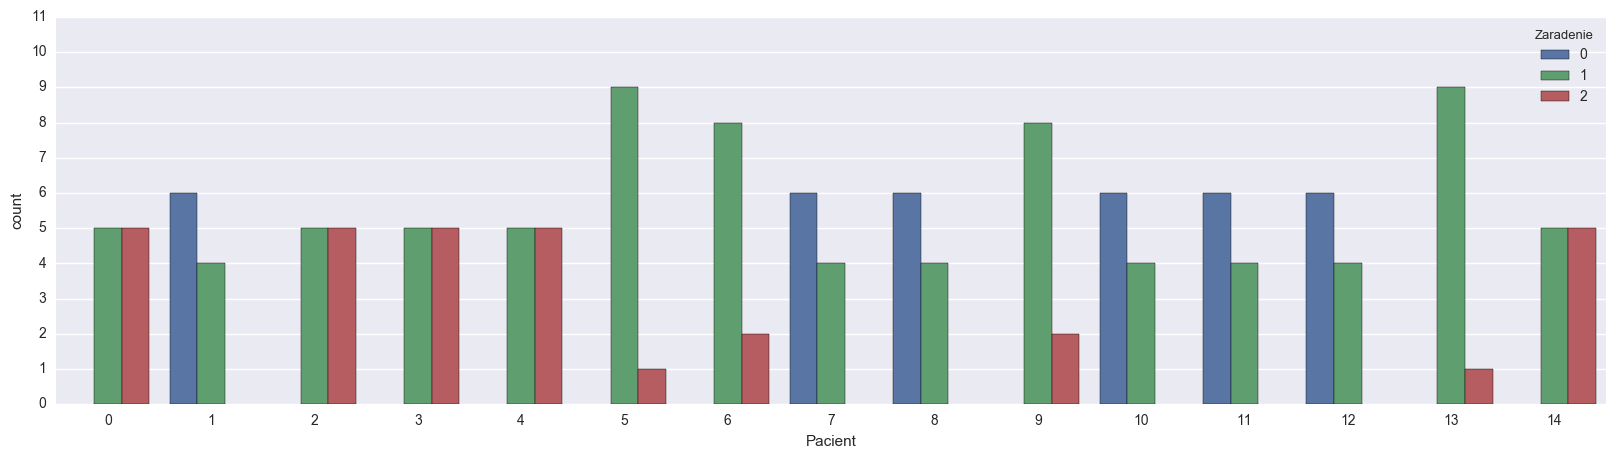

In [56]:
counts1.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts1)
plt.yticks(np.arange(0,12,1))
plt.show()

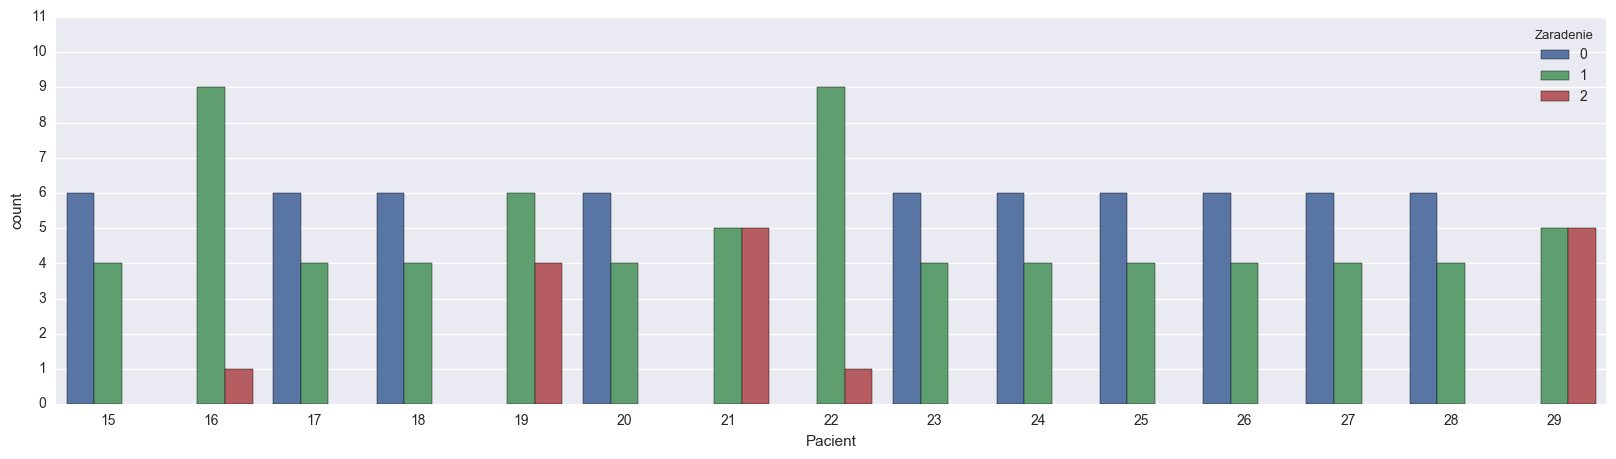

In [57]:
counts2.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts2)
plt.yticks(np.arange(0,12,1))
plt.show()

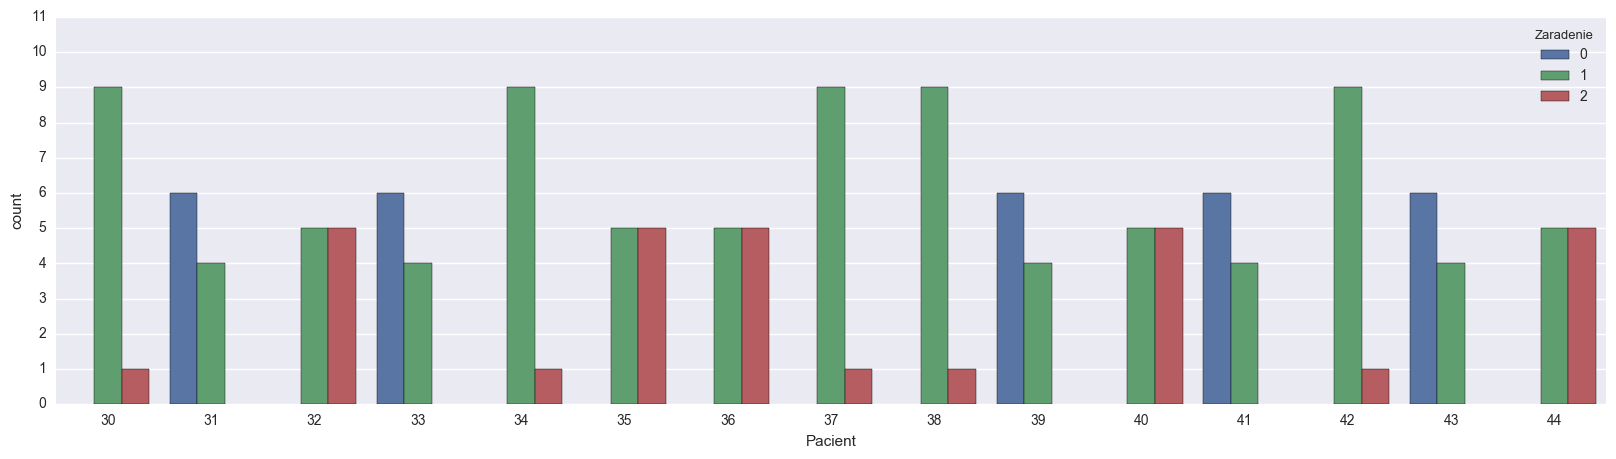

In [58]:
counts3.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts3)
plt.yticks(np.arange(0,12,1))
plt.show()

Ako vidíme nemuseli sa zlepšiť jednotliví doktori v ich samostatnom hodnotení, a bagging aj napriek tomu dosiahol lepšie výsledky ako obyčajný rozhodovací strom (doktor).

To bol teda **klasický bagging**. Povedali sme si však, že existujú aj ďalšie dva spôsoby. Ich princíp je rovnaký ako pri klasickom baggingu, zjednotenie nezávislých klasifikátorov pomocou hlasovania. Rozdiel je teda len v tom ako dosiahnu nezávislosť klasifikátorov.

#### Feature bagging
Tak teda pekne po poriadku. Čo sú to vlastne tie features. To sú v našom príklade, jednotlíve merania, ktoré urobíme pre každé pozorovanie. Mohla by to napríklad byť nameraná teplota, tlak krvi a tak ďalej.


In [22]:
# Už sme si to ukázali na začiatku, ale pozrime si to ešte raz
print(iris.feature_names)

# Môžme vidieť, že Iris dataset má štyri atribúty(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Pri klasickom baggingu sme upravovali výskyt pozorovaní v trénovacej množine pre základné klasifikátory. Urobíme to aj v tomto prípade. 

Avšak pri vytváraní modelu, obmedzíme tieto klasifikátory (doktorov) ešte iným spôsobom. Vždy keď budú chcieť v rozhodovacom strome vytvoriť nové rázcestie, nedovolíme sa im pozrieť na všetky atribúty pozorovaní, ale len na obmedzený počet zo všetkých možných. Keďže tieto zvolené atribúty sa budú vyberať náhodne, budú aj modely doktorov odlišné.

Ak by sme im toto obmedzenie nepridali, vybrali by to najlepšie možné zo všetkých atribútov. Jeho pridáním však dosiahneme ešte väčšiu nezávislosť modelov.

In [59]:
# Vytvorme si teda znova klasifikátor pre feature bagging
# V tomto prípade to bude RandomForestClassifier, ktorý rozširuje bežný BaggingClassifier o feature bagging a iné veci, ktoré
# pre nás teraz podstatné nie sú.

from sklearn.ensemble import RandomForestClassifier

# Aj tento klasifikátor bude mať ako základný klasifikátor už náš známy rozhodovací strom(doktora), teraz je však 
# nastavený automaticky, keďže RandomForestClassifier funguje pomocou DecisionTreeClassifierov.
# To isté platí aj pre veľkosť množiny pozorovaní, ktorá je tu pre každý základný klasifikátor rovnako veľká ako pôvodná.

# Teraz však chceme, aby bolo:
#      - desať základných klasifikátorov (n_estimators)
#      - aby sa pozoravania v kópiach množín mohli opakovať (bootstrap)
#      - aby sa pri rozhodnutí v strome pozeral doktor len na isté množstvo atribútov (max_features)

forest = RandomForestClassifier(max_depth=1,n_estimators = 10,bootstrap = True, max_features = 0.5)

In [60]:
# Opäť už naše známe natrénovanie a vyhdonotenie

forest.fit(X_train,Y_train)

# Pozrime sa ako úspešne si s úlohou poradil
prediction = forest.predict(X_test)

print('Forrest (feature bagging) úspešnosť: ')
print(round(metrics.accuracy_score(Y_test, prediction),2))

print("Zaradenia pacientov z testovacej vzorky podľa šéfa doktorov po hlasovaní doktorov (0-zdravý, 1-chorý, 2-neviem):")
print(prediction)

Forrest (feature bagging) úspešnosť: 
0.98
Zaradenia pacientov z testovacej vzorky podľa šéfa doktorov po hlasovaní doktorov (0-zdravý, 1-chorý, 2-neviem):
[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]


In [61]:
# Overíme si ako dobre sa to naši doktori naučili jednotlivo
predictions = []

# Aj implementácia randomForestu v scikit-learn nám umožňuje pristúpiť k jednotlivým základným klasifikátorom
for tree in forest.estimators_:
    predictions.append(tree.predict(X_test))    

i = 1
for p in predictions:
    print('Doktor '+str(i)+' úspešnosť: ')
    print(round(metrics.accuracy_score(Y_test, p),2))
    i += 1
    
# Ako vidíme aj tu sa jednotliví doktori niektorý zlepšili, iný zhoršili

Doktor 1 úspešnosť: 
0.78
Doktor 2 úspešnosť: 
0.69
Doktor 3 úspešnosť: 
0.78
Doktor 4 úspešnosť: 
0.78
Doktor 5 úspešnosť: 
0.69
Doktor 6 úspešnosť: 
0.69
Doktor 7 úspešnosť: 
0.69
Doktor 8 úspešnosť: 
0.51
Doktor 9 úspešnosť: 
0.73
Doktor 10 úspešnosť: 
0.47


In [62]:
# Ak chceme vidieť konkrétne hodnoty 

# Toto je len kód na zobrazenie výsledkov, ten si nemusíte veľmi pozerať ak vás nezaujíma
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

cols = []
for i in range(0,len(predictions[1])):
    cols.append(i)

predictions2 = []

for prediction in predictions:
    predictions2.append(np.stack((prediction,np.array(cols)), axis=1))

predictions2 = np.vstack(predictions2)
predictions2 = predictions2[predictions2[:, 1].argsort()]

halfs = np.split(predictions2, 3)

counts1 = pd.DataFrame(halfs[0])
counts2 = pd.DataFrame(halfs[1])
counts3 = pd.DataFrame(halfs[2])

## Zaradenia pacientov doktormi do skupín. Os X sú pacienti. Os y sú hlasy pre danú skupinu od doktorov. Existujú tri možné zaradenia 0, 1 a 2 pre každého pacienta.

### Doktori už nehlasovali všetci rovnako

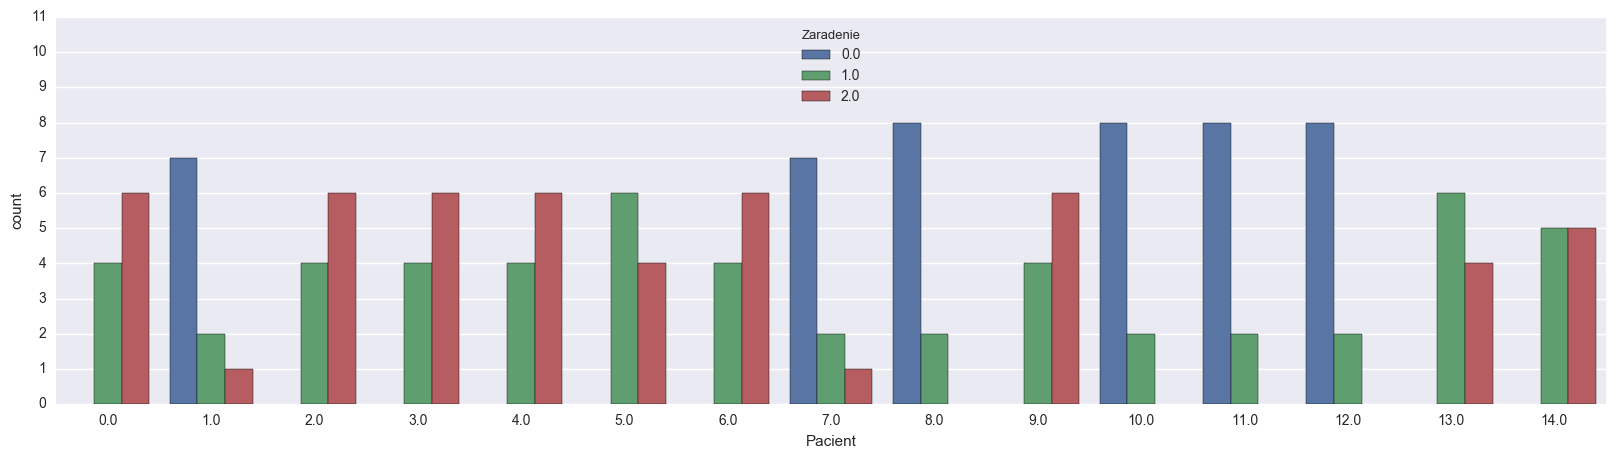

In [63]:
counts1.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts1)
plt.yticks(np.arange(0,12,1))
plt.show()

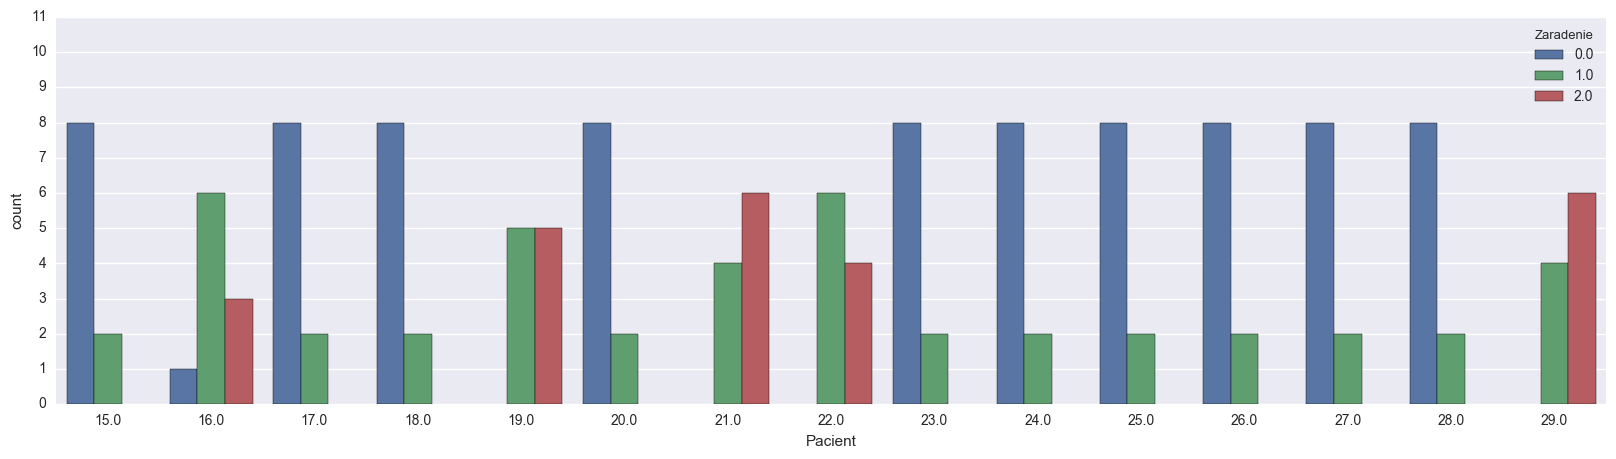

In [64]:
counts2.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts2)
plt.yticks(np.arange(0,12,1))
plt.show()

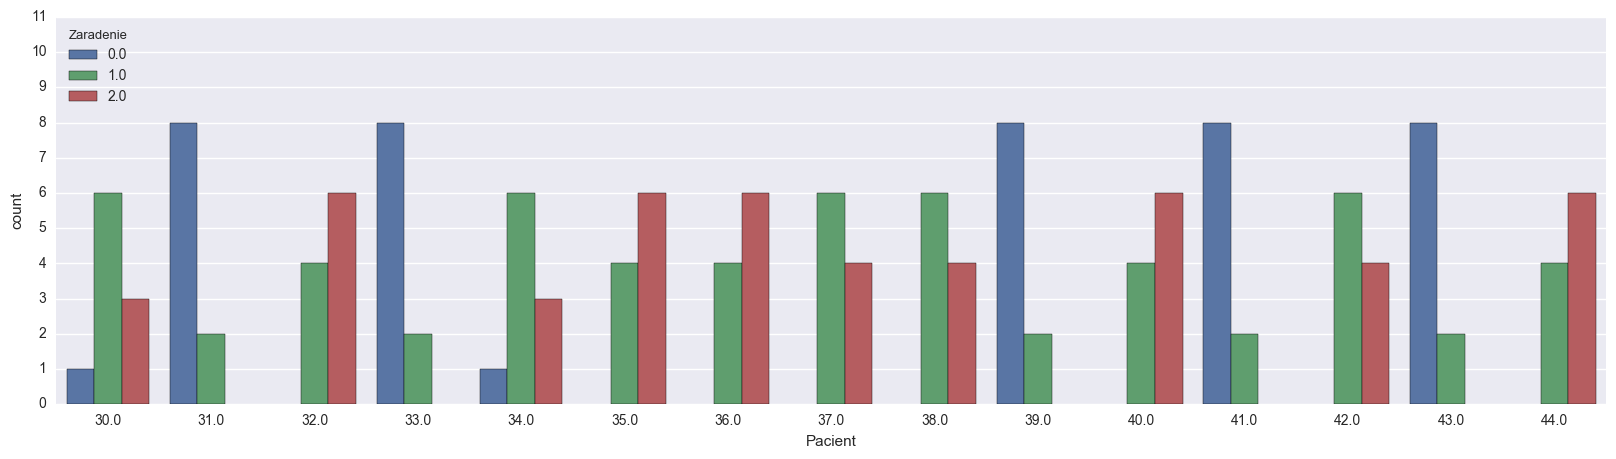

In [65]:
counts3.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts3)
plt.yticks(np.arange(0,12,1))
plt.show()

Aby sme to uviedli na pravú mieru, použitím RandomForestu, ktorému sme umožnili aj bootstrap pozorovaní, sme vlastne skombinovali **klasický bagging** a **feature bagging**. Ak by niekto chcel použiť iba feature bagging, Je nutné nastaviť bootstrap na **False**.

To by bol teda feature bagging. Ostáva nám teda už len možnosť dosiahnuť nezávislosť základných modelov pomocou rôznych základných klasifikátorov.

#### Rôzne algoritmy klasifikácie
Vo všetkých príkladoch, o ktorých sme si doteraz hovorili, sme sa snažili využiť doktorov, ktorý mali rovnaké vzdelanie a riadili sa rovnakými pravidlami. Z toho dôvodu sme potreboali meniť údaje, s ktorými pracovali, aby sme dosiahli nezávislosť modelov. Čo ak by sme však zohnali doktorov, ktorí budú mať vzdelanie z iných škôl a budú používať iné pravidlá? 

Áno, aj týmto spôsobom je možné dosiahnuť nezávislosť základných modelov.

In [66]:
# V knižnici scikit-learn nie je doslovne priamo naimplementovaný bagging, ktorý by využíval túto možnosť.
# Existuje však Voting classifier, ktorý robí to čo chceme momentálne dosiahnuť.
# Externí doktori sú drahí a tak budeme mať len troch

# Klasifikátor, ktorý klasifikuje na základe najbližích susedov
from sklearn.neighbors import KNeighborsClassifier
# Neuronova sieť
from sklearn.linear_model import Perceptron
# Naive Bayes klasifikátor
from sklearn.naive_bayes import GaussianNB

Neural = Perceptron()
KNN = KNeighborsClassifier(n_neighbors=2)
GNB = GaussianNB()
Tree = DecisionTreeClassifier(max_depth=1)

# Máme aj klasifikátor na hlasovanie
from sklearn.ensemble import VotingClassifier

# Ako argumenty pre hlasovací klasifikátor musíme poskytnúť základné klasifikátory, ktorým sme priradili mená,
# a argument voting nastavený na hard, aby sa robilo majoritné hlasovanie
Ensemble = VotingClassifier(estimators=[('Tree', Tree), ('KNN', KNN),('GNB', GNB), ('Neural', Neural)], voting='hard')

In [67]:
# Tak znova natrénovanie a vyhdonotenie

Ensemble.fit(X_train,Y_train)

# Pozrime sa ako úspešne si s úlohou poradil
prediction = Ensemble.predict(X_test)

print('Rozdielne kalsifikátory úspešnosť: ')
print(round(metrics.accuracy_score(Y_test, prediction),2))

print("Zaradenia pacientov z testovacej vzorky podľa šéfa doktorov po hlasovaní doktorov (0-zdravý, 1-chorý, 2-neviem):")
print(prediction)

Rozdielne kalsifikátory úspešnosť: 
0.98
Zaradenia pacientov z testovacej vzorky podľa šéfa doktorov po hlasovaní doktorov (0-zdravý, 1-chorý, 2-neviem):
[2 0 2 2 2 1 1 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]


In [68]:
# Overíme si ako dobre sa to naši doktori naučili jednotlivo
predictions = []


for clf in Ensemble.estimators_:
    predictions.append(clf.predict(X_test))    

i = 1
for p,clf in zip(predictions,Ensemble.estimators):
    print('Doktor '+str(i)+'-'+clf[0]+' úspešnosť: ')
    print(round(metrics.accuracy_score(Y_test, p),2))
    i += 1
    
# Ako vidíme aj tu sa jednotliví doktori niektorý zlepšili, iný zhoršili

Doktor 1-Tree úspešnosť: 
0.69
Doktor 2-KNN úspešnosť: 
0.96
Doktor 3-GNB úspešnosť: 
0.98
Doktor 4-Neural úspešnosť: 
0.78


In [70]:
# Ak chceme vidieť konkrétne hodnoty 

# Toto je len kód na zobrazenie výsledkov, ten si nemusíte veľmi pozerať ak vás nezaujíma
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

cols = []
for i in range(0,len(predictions[1])):
    cols.append(i)

predictions2 = []

for prediction in predictions:
    predictions2.append(np.stack((prediction,np.array(cols)), axis=1))

predictions2 = np.vstack(predictions2)
predictions2 = predictions2[predictions2[:, 1].argsort()]

halfs = np.split(predictions2, 3)

counts1 = pd.DataFrame(halfs[0])
counts2 = pd.DataFrame(halfs[1])
counts3 = pd.DataFrame(halfs[2])

## Zaradenia pacientov doktormi do skupín. Os X sú pacienti. Os y sú hlasy pre danú skupinu od doktorov. Existujú tri možné zaradenia 0, 1 a 2 pre každého pacienta.

### Doktori už nehlasovali všetci rovnako

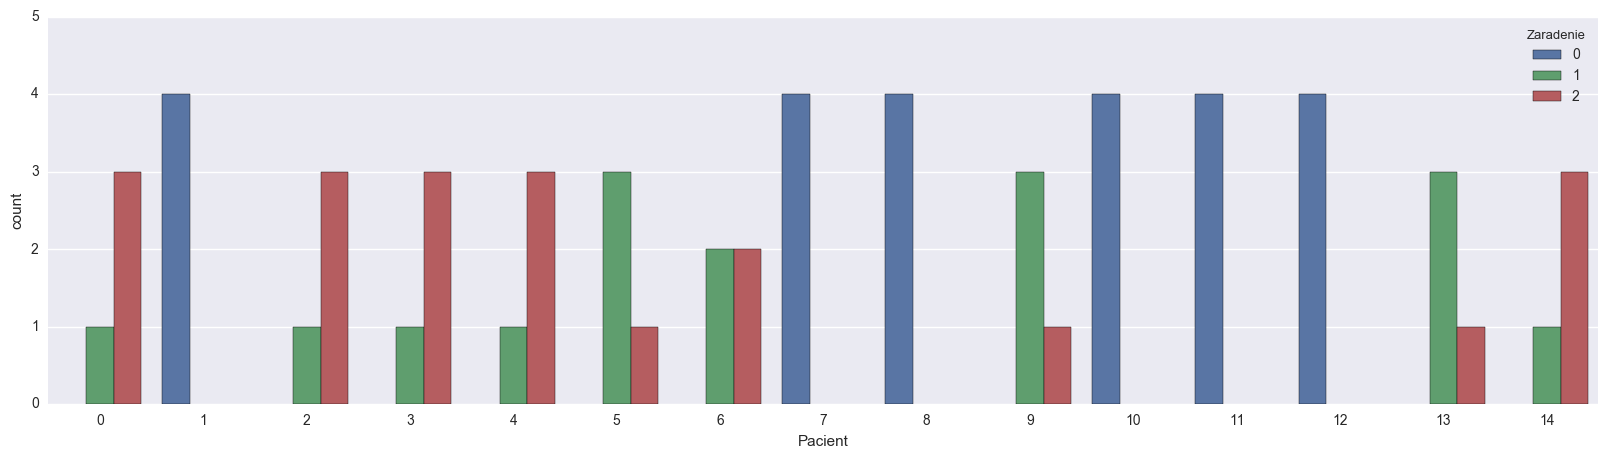

In [72]:
counts1.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts1)
plt.yticks(np.arange(0,6,1))
plt.show()

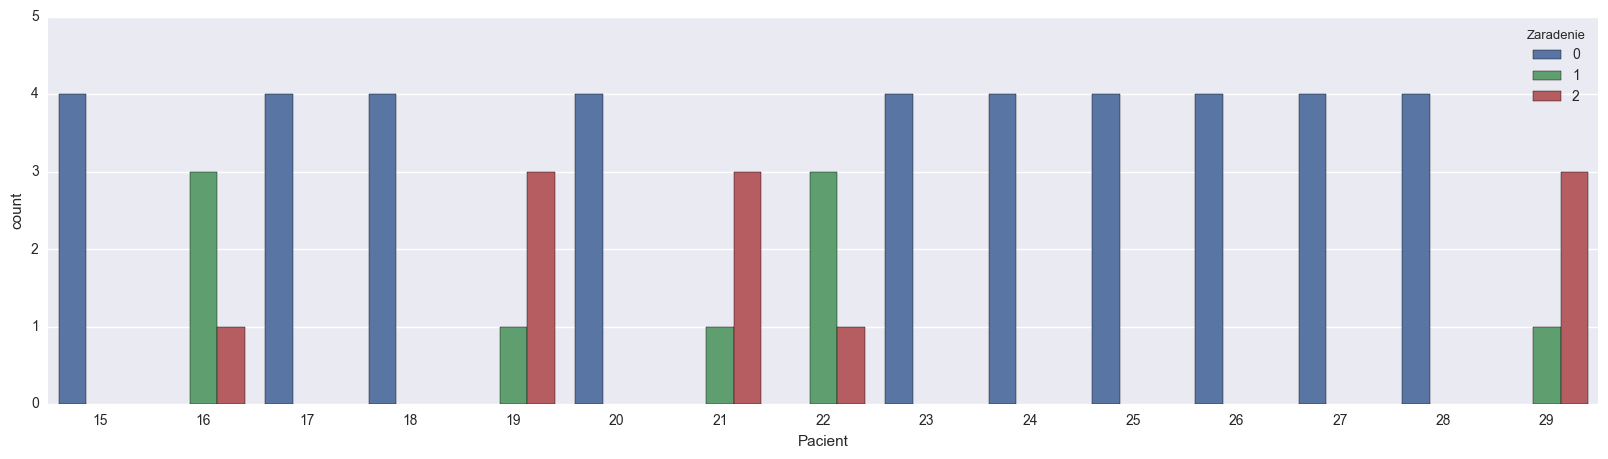

In [73]:
counts2.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts2)
plt.yticks(np.arange(0,6,1))
plt.show()

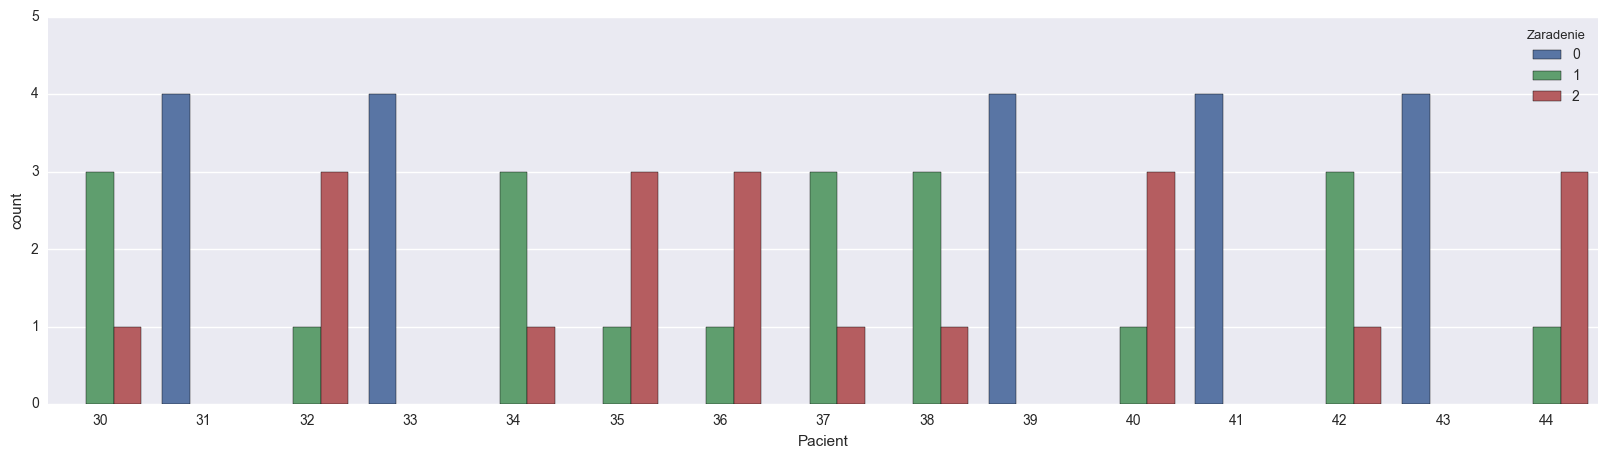

In [74]:
counts3.columns=["Zaradenie","Pacient"]
fig=plt.figure(figsize=(20, 5), dpi= 100)
sns.countplot(x="Pacient",hue="Zaradenie", data=counts3)
plt.yticks(np.arange(0,6,1))
plt.show()

# Čo viac treba vedieť k baggingu
Opísali a ukázli sme si teda postup akým funguje bagging.

Čo by teda ešte bolo dobré vedieť.

## Nevýhody
Možno ste si už uvedomili, v čom môže byť problém baggingu. Je to nevýhoda, ktorú má každá ensemble metóda. Je to čas výpočtu/predikcie. Musíme si uvedomiť, že ak použijeme jeden rozhodovací strom, tak ten sa natrénuje a napredikuje nám keď treba. Ak však použijeme bagging, znásobujeme toto vykonávanie počtom základných klasifikátorov, plus čas potrebný na výsledky hlasovania. Ak si predstavíme, že by sme napríklad chceli bagging na 100 stromov, na dataset s 250 000 pozorovaniami, vzniká nám už celkom veľký rozdiel.

## Výhody
Existujú samozrejme aj výhody.

V našich príkladoch sme ukazovali, že bagging zlepšoval výsledky klasifikácie. To je v podstate pravda. Musíme si však uvedomiť, čo je výsledkom práce klasifikátora. Tým je model, podľa ktorého vieme predikovať zaradenie pozorovaní.

**Bagging zlepšuje výsledky klasifikácie znižovaním variancie**.

Táto informácia je kľúčová.

Totiž, chyby pri klasifikácií vznikajú kvôli dvom hlavným faktorom. **Variancií** a **vychýlenosti**.

Téma variancie a vychýlenosti je celkom komplexná, a vysvetliť ju dopodrobna by asi bolo vhodné v tutoriale venovanému len tejto téme. Aby sme však mali predstavu čo to je aspoň variancia, keďže je znižovanie súvisí aj z baggingom, pokúsime sa ju zjednodušene vysvetliť.

Naspäť k príkladu o doktoroch.

Predstavme si, že doktor sa naučil zo starých pozorovaní rozoznávať chorých a zdravých. Táto jeho schopnosť je previazaná s pozorovaniami, z ktorćyh ich získal. Strávil pri vytváraní pravidiel, podľa ktorých zaraduje pacientov naozaj veľa času. Prišiel k záverom, že aj maličkosti môžu rozhodnúť o zaradení.

Ak však príde pacient, ktorý napríklad bude chorý, ale nejaká hdonota merania pri jeho pozorovaní nebude zapadať do pravidiel modelu, ktorý doktor vytvoril, doktor ho môže zle zaradiť. Pri pozorovaniach sa totiž s takou hodnotou daného merania nestretol, a tak nevie čo má presne robiť. To mu pri naozajstných pacientoch zníži presnosť jeho zaradení.

Bagging sa vlastne snaží znížiť previazanosť modelov na trénovacie pozorovania a pripraviť taký model, ktorý si poradí aj s menej predvídanými hodnotami atribútov v pozorovaní.

Tu sa ukazuje, že variancia súvisí s **pretrénovaním**. Obi dve v podstate hovoria o tom istom. Ak sa klasifikátor pri trénovaní príliš zamerá a do podrobností naučí rozpoznávať pozorovania, na ktorých trénuje, hovoríme o pretrénovaní. V prípade baggingu, sa môže stať že základné klasifikátory sa pretrénujú. Ale vďaka tomu, že pri baggingu sú jednotlivé stromy nezávislé, neprejaví sa pretrénovanie vo výsledku. **Samotný bagging teda znižuje dopad, ktorý má pretrénovanie na výsledok klasifikácie.**

Nám by teda až do takej miery nevadilo, keby základné klasifikátory mali veľkú varianciu, pretože bagging by znížil jej dopad na celkovú klasifikáciu.